# Medical Embeddings and clinical trial search engine

In [2]:
import streamlit as st  #importing streamlit liabrary

In [3]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [4]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context




In [5]:
import matplotlib.pyplot as plt # our main display package
import plotly.graph_objects as go
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bsaih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bsaih\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bsaih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Importing datasets 

In [6]:
df=pd.read_csv('Dimension-covid.csv')   #for preprocessing
df1=pd.read_csv('Dimension-covid.csv')  #for returning results

# Preprocessing data 

In [7]:
# understand the data

df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,The aim was to determine the coronavirus anxie...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,This is a randomized controlled trial to exami...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,The purpose of this study is to learn how to b...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,Poorly controlled chronic pain in teens can im...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,There are currently no precise data available ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [8]:
# understand the data

df.shape

(10666, 21)

In [9]:
df['Abstract'][0]

'The aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects.\n\nDetailed Description\nThe aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects. This study was completed with the descriptive, cross-sectional and relational screening model. The full sampling method was used in the study. The study was completed with 105 individuals with metabolic syndrome attending the diet clinic and 109 healthy individuals without MetS diagnosis also attending the diet clinic. Collection of data used anthropometric measurements and biochemical findings, blood pressure and a survey f

In [11]:
# function to remove all urls
def remove_urls(text):    
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

# make all text lowercase
def text_lowercase(text):
    return text.lower()

# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize Words 
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

#Creating one function so that all functions can be applied at once
def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [26]:
''

#Applying preprocessing and removing '\n' character

for i in range(df.shape[0]):
    df['Abstract'][i]=preprocessing(str(df['Abstract'][i])) 
for text in df.Abstract:

    text=text.replace('\n',' ')   

for i in range(df.shape[0]):
    df['Title'][i]=preprocessing(str(df['Title'][i])) 
for text in df.Title:

    text=text.replace('\n',' ') 
  

# Exploratory data analysis

In [27]:
df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,relationship coronavirus anxiety level emotion...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,aim determine coronavirus anxiety level emotio...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,effect palmitoylethanolamide proinflammatory m...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,randomized controlled trial examine effect foo...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,detection sars cov rna biomarkers coughed drop...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,purpose study learn better detect infection un...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,pain rehabilitation virtual reality pr vr home...,PR-VR At-home Program During and After COVID-19,NaN,poorly controlled chronic pain teen impact qua...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,perceived health hospitalization covid,Perceived Health After Hospitalization for COV...,PRO-COVID,currently precise data available impact covid ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [28]:
df['Abstract'][4]

'currently precise data available impact covid daily life patient hospitalization moment study demonstrated strong impact diagnosis domain quality life explored mo sf questionnaire phq depression score concerning impact covid disease conventional hospitalization field report indicate extremely intense fatigue major physical impact lasting several week'

In [47]:

print(df['Abstract'][0])

aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject detailed description aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject study completed descriptive cross sectional relational screening model full sampling method used study study completed individual metabolic syndrome attending diet clinic healthy individual without mets diagnosis also attending diet clinic collection data used anthropometric measurement biochemical finding blood pressure survey form coronavirus anxiety scale ca emotional eating scale ee


In [48]:
x=[word_tokenize(word) for word in df.Abstract ]   #Tokenizing data for training purpose

# Exploratory data analysis

In [50]:
from collections import Counter
cnt = Counter()
for text in df["Abstract"].values:
    # Check if the text is a string instance before splitting
    if isinstance(text, str):
        for word in text.split():
            cnt[word] += 1

# Training skipgram model


In [51]:
# training the model

skipgram = Word2Vec(x, vector_size =50, window = 3, min_count=5 ,sg = 1)
print(skipgram)
skipgram.save('skipgramx1.bin')

Word2Vec<vocab=14324, vector_size=50, alpha=0.025>


In [52]:
# training the model

skipgram = Word2Vec(x, vector_size =100, window = 1, min_count=3,sg = 1)

skipgram.save('skipgramx2.bin')

In [53]:
# Loading the model
skipgram = Word2Vec.load('skipgramx2.bin')

# Training Fasttext model

In [ ]:
# fast_n= FastText(x,vector_size=200, window=3, min_count=2, workers=5, min_n=1, max_n=2,sg=1)  #training fasttext Model, with skipgram
# fast_n=fast_n.save('fast_p.bin')    #Saving our model
# fast_n = Word2Vec.load('fast_p.bin')  #Loading our pretrained model


In [ ]:
# FastText=FastText(x,vector_size=100, window=2, min_count=2, workers=5, min_n=1, max_n=2,sg=1)
# FastText.save('FastText.bin')    #Saving our model
# FastText = Word2Vec.load('FastText.bin')  #Loading our pretrained model

## Model embeddings - Similarity

In [54]:
# Similar words - skipgram
skipgram.wv.most_similar(positive=['virus'],topn=10)

[('pathogen', 0.7233397960662842),
 ('viral', 0.6758182644844055),
 ('chikungunya', 0.6720664501190186),
 ('coronaviruses', 0.6704850792884827),
 ('virion', 0.6555158495903015),
 ('airborne', 0.6293444633483887),
 ('herpes', 0.6287558078765869),
 ('contagious', 0.6204453110694885),
 ('zoonotic', 0.6197810769081116),
 ('bacteria', 0.6089375615119934)]

In [56]:
skipgram.wv.most_similar(positive=['lung'],topn=10)

[('pulmonary', 0.6549603343009949),
 ('myocardial', 0.6001201272010803),
 ('alveolar', 0.5997226238250732),
 ('ocular', 0.5906752347946167),
 ('doppler', 0.5902682542800903),
 ('testicular', 0.5902379751205444),
 ('vili', 0.5862939357757568),
 ('cardiopulmonary', 0.5804935097694397),
 ('kidney', 0.5799474716186523),
 ('brain', 0.5734965205192566)]

In [ ]:
# Similar words - fasttext

# FastText.wv.most_similar(positive=['lung'],topn=10)

In [ ]:
# FastText.wv.most_similar(positive=[''],topn=10)

# PCA Plot - Skipgram

In [57]:
X = skipgram.wv[skipgram.wv.index_to_key] # Extracts all word vectors from the Skip-gram model in the vocabulary order.
   
pca = PCA(n_components=2) 
result = pca.fit_transform(X)
print(result.shape)


(19177, 2)


In [50]:
#


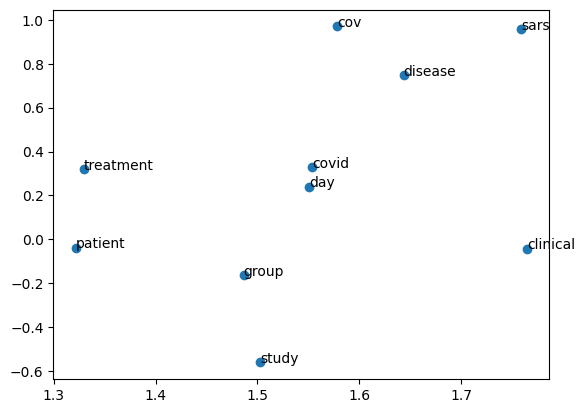

In [58]:

# Extract the first 10 words and their embeddings
top_words = skipgram.wv.index_to_key[:10]
top_embeddings = result[:10]

# Plot each word embedding
plt.scatter(top_embeddings[:, 0], top_embeddings[:, 1])

# Annotate each point with its corresponding word
for i, word in enumerate(top_words):
    plt.text(top_embeddings[i, 0], top_embeddings[i, 1], word)

# Display the plot
plt.show()

 "covid" and "disease" appear close to each other, suggesting that in the dataset used for training the word embeddings, these words are related or used together frequently

 "clinical", "group", "data", "study", suggesting these words are part of a discourse on clinical studies or medical research.

 

# PCA Plot - Fasttest

In [ ]:
# #same thing as above but with fasttext model
# X_fast = FastText.wv[FastText.wv.index_to_key]
# pca = PCA(n_components=2)
# result_fast = pca.fit_transform(X_fast)

In [ ]:
# pyplot.scatter(result_fast[:10, 0], result_fast[:10, 1])
# words = list(FastText.wv.index_to_key)
# for i, word in enumerate(words[:10]):
#     pyplot.annotate(word, xy=(result_fast[i, 0], result_fast[i, 1]))
# pyplot.show()

# Getting Vectors for each abstract


In [59]:
vector_size=100   #defining vector size for each word

### Method 1

### Method 2

In [60]:
def get_mean_vector(word2vec_model, words):
    # Tokenize the input text and initialize an empty list for valid words
    tokenized_words = tokenize(words)
    valid_words = []

    # Check each word to see if it's in the model's vocabulary
    for word in tokenized_words:
        if word in word2vec_model.wv.index_to_key:
            valid_words.append(word)
    
    # If there are valid words, calculate and return their mean vector
    if len(valid_words) >= 1:
        return np.mean(word2vec_model.wv[valid_words], axis=0)
    # If there are no valid words, return a zero vector
    else:
        return np.array([0]*100)


### Abstract to vectors using skipgram Model

In [63]:
vector_list = []

# Convert each abstract to a vector and append it to the list
for abstract in df['Abstract']:
    vector = get_mean_vector(skipgram, abstract)  # This function call assumes abstract is already tokenized if needed
    vector_list.append(vector.tolist())  # Convert array to list and append

# Convert the list of vectors into a DataFrame
vectors_df = pd.DataFrame(vector_list)

# Optionally transpose the DataFrame if needed
vectors_df = vectors_df.transpose()  

# Save the DataFrame to a CSV file
vectors_df.to_csv('skipgram-vec.csv', index=False)

In [64]:
K=pd.read_csv('skipgram-vec.csv')   #Loading our pretrained vectors of each abstract

skipgram_vectors=[] 
for i in range(df.shape[0]):
    skipgram_vectors.append(K[str(i)].values)
 

### For converting Title into vectors using skipgram

In [65]:
K_title=[]
for i in df.Title:         #instead of abstract use title
    K_title.append(list(get_mean_vector(skipgram, i))) 

K_title=pd.DataFrame(K_title).transpose()  # Saving vectors of each abstract in data frame so that we can use directly while running code again
K_title.to_csv('skipgram-vec-title.csv')    

In [77]:
import pandas as pd

# Load the DataFrame from a CSV file
K_title_df = pd.read_csv('skipgram-vec-title.csv')

# Initialize an empty list to store vectors
K_title = []

# Iterate over each column (each column represents a vector for an abstract)
# Assuming each row in the CSV file corresponds to a vector component of titles
for i in range(K_title_df.shape[0]):  
    # Append the column values as a list to K_title
    K_title.append(K_title_df[str(i)].values.tolist())  # Use tolist() for converting to list


### Abstract to vector using FastText 

In [ ]:
# K_fast=[]                                     #defining empty list
# for i in df.Abstract:
#     K_fast.append(list(get_mean_vector(FastText, i)))     #appending array to the list
    
# K11=pd.DataFrame(K_fast).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
# K11.to_csv('FastText-vec.csv')

In [ ]:
# data=pd.read_csv('FastText-vec.csv')#Loading our pretrained vectors of each abstract

# fast_vectors=[] #transforming dataframe into required array like structure as we did in above step
# for i in range(df.shape[0]):
#     fast_vectors.append(data[str(i)].values)

# Cosine similarity function

In [67]:
#defining function to define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

# Input query Preprocessing

In [68]:
#Preprocessing input, because input should be in same form as training data set

def preprocessing_input(query,word2vec_model):
    query=preprocessing(query)
    query=query.replace('\n',' ')
    K=get_mean_vector(word2vec_model,query)
       

    return K

# Function to return 'n' similar results

In [69]:
pd.set_option("display.max_colwidth", None)       #this function will display full text from each column

In [78]:
def top_n(query, p, df1, model, n=5):
    print(query)
    
    # Preprocess the input query into a vector
    query_vector = preprocessing_input(query, model)
    
    # Calculate cosine similarities and store them in a list
    similarities = [cos_sim(query_vector, p_vector) for p_vector in p]
    
    # Get indices of the top n items based on cosine similarity
    top_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:n]
    
    # Extract the top n similarities
    top_similarities = [similarities[i] for i in top_indices]
    
    # Retrieve the corresponding rows from df1
    top_rows = df1.iloc[top_indices, [1, 2, 5, 6]]
    
    print(top_similarities)
    return top_rows, top_similarities


## Result Evaluation

In [79]:
# skipgram model

#Input your search query here

Query = "lung"

Results,sim = top_n(Query, skipgram_vectors, df1, skipgram)
Results

lung
[0.6727695280023931, 0.669300151313261, 0.6689557559995652, 0.6657115606410245, 0.6643269997074693]


,Trial ID,Title,Abstract,Publication date
10319,CHICTR2000030114,"Lung ultrasound in the diagnosis, treatment and prognosis of pulmonary lesions of novel coronavirus pneumonia(COVID-19)","1) lung ultrasound characteristics of pulmonary lesions in severe cases of new coronavirus pneumonia; Compared with chest CT, diagnostic value of lung ultrasound in pulmonary lesions caused by novel coronavirus pneumonia;\n2) continuous monitoring of lung ultrasound to evaluate the severity of pulmonary lesions caused by severe novel coronavirus pneumonia;\n3) lung ultrasound guided treatment can improve the prognosis.",2020-02-24
7831,2020-001807-18,"A Phase 2, Randomized, Double-Blind, Placebo-Controlled, Parallel-group, Multi-center Study of an Inhaled Pan-Janus Kinase Inhibitor, TD-0903, to Treat Symptomatic Acute Lung Injury Associated with COVID-19",Acute lung injury associated with COVID-19,2020-10-13
8628,DRKS00021585,Lung Ultrasound in Covid-19 Pneumonia,\n\nDetailed Description\nProspective evaluation of the agreement between Lung-Ultrasound according to the Basic Lung Ultrasound in Emergency (BLUE)-protocol and computed tomography of the lungs in diagnosis of viral pneumonia.,2020-04-24
10124,CHICTR2000030578,Clinical Prediction and Intervention of Pulmonary Function Impairment in Patients with Novel Coronavirus Pneumonia (COVID-19),"1. Establish a cohort of survivors of new coronavirus pneumonia, track their lung function damage and changes after discharge, and establish a predictive model of lung function impairment of new coronavirus pneumonia;\n2. Explore lung rehabilitation in patients with impaired lung function effect.",2020-02-01
4328,NCT04588441,Aerosolized Inhaled Adenosine Treatment in Patients With Acute Respiratory Distress Syndrome (ARDS) Caused by COVID-19 (The ARCTIC Trial),"This is a phase II study to test adenosine efficacy for down-regulation of the overwhelming inflammation of COVID-19 in the lungs as reflected by clinical recovery of lung function; resolution of clinically relevant markers of lung function, and resolution of systemic markers of inflammation and coagulation.",2021-07-01


In [75]:
# fasttext model

#Input your search query here

Query = "oxygen"

Results,sim=top_n(Query,skipgram_vectors,df1,skipgram)
Results

oxygen
[0.7394906666835456, 0.7167874586653215, 0.6953142665746689, 0.6951707042181997, 0.6850617622632026]


,Trial ID,Title,Abstract,Publication date
3444,UMIN000042524,Investigation of the Safety and Efficacy of Oxygen Administration over a Surgical Facemask,"For the anesthetic management of patients with novel coronavirus infection, it is recommended that a surgical mask be placed on the patient after extubation and an oxygen mask be placed over the surgical mask. However, data on safety and effectiveness have not been presented. Therefore, we will examine the fraction of inhaled oxygen (FIO2), partial pressure of inhaled carbon dioxide (PICO2), and transcutaneous oxygen saturation (SpO2) when oxygen is administered by wearing an oxygen mask over a surgical mask.",2020-11-24
1038,UMIN000043867,A Study on the Concentration of Inhaled Oxygen when Oxygen is Administered with an Oxygen Mask while Using a Surgical Mask:A study on the appropriate oxygen administration method under Covid 19 epidemic conditions.,"When oxygen is administered to a subject wearing a surgical mask over it, clarify whether the inhaled oxygen concentration at the mouth reaches the desired concentration.",2021-05-01
4069,CTRI/2020/08/027503,Low Dose Aspirin in Moderate to Severe SARS- CoV-2 Infected Patients: A Pilot Randomized Controlled Trial,"Study Protocol Clinical management of all patients including fluid therapy, oxygen therapy, drug therapy, monitoring of vitals, baseline blood investigations, chest X ray and point of care ultrasound will be as per standard Institute protocol. Oxygen by facemask will be provided when room air oxyhemoglobin saturation< 94%) and high flow nasal oxygen (HFNO) therapy will be used when oxyhemoglobin saturation < 92% despite of 10L/min of oxygen by normal facemask. Non-invasive / invasive mechanical ventilation will be initiated if a patient develops increasing respiratory distress and hypoxia even with HFNO.\n\n\nPrimary Outcome:\n\nTo compare SpO2/ FiO2 ratio in day 1- 7 post randomization in both the groups\n\n\n\nSecondary Outcome:\n\n1.\tTo compare the ventilation free days (VFD.\n2.\tTo compare the high flow nasal oxygen and/ or NIV free days (NVFD) in both the groups.\n3.\tTo compare supplemental oxygen free days (OFD).\n4.\tTo compare mortality in both the groups.",2021-06-15
9188,NCT04346420,Impact of the Double-Trunk Mask on Oxygenation Titration in Patients With COVID-19,"This study will investigate the impact of the Double-Trunk Mask (DTM) on the reduction of oxygen titration in patients with severe hypoxemia.\n\nDetailed Description\nThe Double-Trunk Mask (DTM) is a device designed to increase the fraction of inspired oxygen in patients who receive oxygen therapy. The mask is composed of a regular aerosol mask with corrugated tubing (15 cm length) inserted into two lateral holes. Each included patient will wear standard nasal cannula in addition to the Double-Trunk Mask for 30 minutes, then only their standard oxygen interface for the next 30 minutes. While maintaining the oxygen saturation by pulse oximetry (SpO2) at a target value of 94%, the impact of the DTM will be assessed by measuring the change of oxygen flow given to the patient.",2020-04-09
7778,NCT04392089,Effects of Cardiovascular and Pulmonary Optimisation on Cerebral Oxygenation in COVID-19 Patients With Severe ARDS,"The aim of the present study is to examine whether cerebral oxygenation could be a more useful parameter than peripheral oxygen saturation to guide clinical titration of permissive hypoxemia in COVID-19 ARDS patients\n\nDetailed Description\nMechanical ventilation is the cornerstone of supportive management for most ARDS patients to prevent life-threatening hypoxemia. Arterial oxygenation can be improved via ventilator by increasing fractional inspired oxygen (FiO2) and/or increasing mean airway pressure. When treating mechanically ventilated ARDS patients, the benefit of improved arterial oxygenation must be balanced against the potential risk of ventilator-induced lung injury (VILI), oxygen toxicity occurring with high FiO2 and develo

# Streamlit App (Refer Medical.py file to run the app)

In [ ]:


def main():
    # Load data and models
    data = df1  # our data which we have to display

    st.title("Clinical Trial Search engine")  # title of our app
    st.write('Select Model')  # text below title

    # User selects the model
    Vectors = st.selectbox("Model", options=['Skipgram', 'Fasttext'])
    if Vectors == 'Skipgram':
        K = K2
        word2vec_model = skipgram
    elif Vectors == 'Fasttext':
        K = K1
        word2vec_model = FastText

    st.write('Type your query here')
    query = st.text_input("Search box")  # getting input from user

    def preprocessing_input(query):
        query = preprocessing(query)
        query = query.replace('\n', ' ')
        K = get_mean_vector(word2vec_model, query)
        return K
    def top_n(query, p, df1):
        query = preprocessing_input(query)
        x = []

        for i in range(len(p)):
            x.append(cos_sim(query, p[i]))
        tmp = list(x)
        res = sorted(range(len(x)), key=lambda sub: x[sub])[-10:]
        sim = [tmp[i] for i in reversed(res)]
        print(sim)

        L = []
        for i in reversed(res):
            L.append(i)
        return df1.iloc[L, [1, 2, 5, 6]], sim

    model=top_n
    if query:
        P, sim = model(str(query), K, data)  # storing our output dataframe in P
        
        # Plotly function to display our dataframe in the form of a plotly table
        fig = go.Figure(data=[go.Table(
            header=dict(values=['ID', 'Title', 'Abstract', 'Publication Date', 'Score']),
            cells=dict(values=[
                list(P['Trial ID'].values),
                list(P['Title'].values),
                list(P['Abstract'].values),
                list(P['Publication date'].values),
                list(np.around(sim, 4))
            ], align=['center', 'right'])
        )])
    
    # Displaying our plotly table
        fig.update_layout(height=1700, width=700, margin=dict(l=10, r=10, t=20, b=20))
        
        st.plotly_chart(fig)  # Get individual results

if __name__=="main":
    main()



In [ ]:
!pip freeze>requirements.txt